<h1 align="center">Using Maching Learning for Credit Card Fraud Detection - A Springboard Capstone Project</h1>

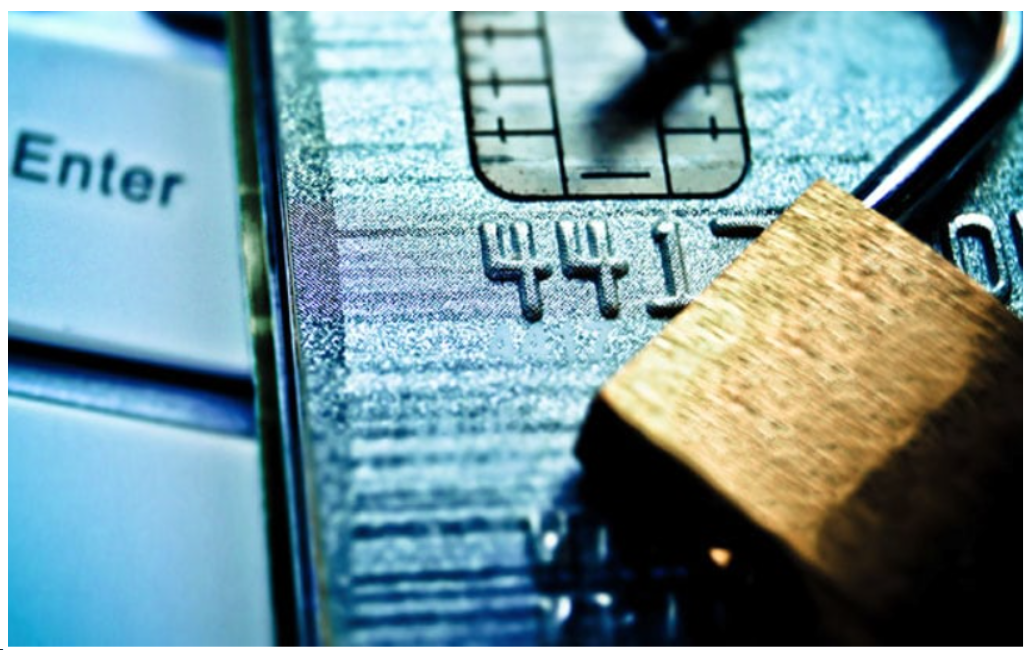   

### Loading libraries

In [4]:
#!pip install scikeras
#!pip install scikit-learn==1.5.2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImPipline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import set_config
import time
from datetime import timedelta

### Reading data

In [6]:
trans_data = pd.read_csv(r'C:\Users\bkt29\OneDrive\Desktop\MLE_AI\datasets\card_transdata.csv')

##### Description

This dataset captures transaction patterns and behaviors that could indicate potential fraud in card transactions. The data is composed of several features designed to reflect the transactional context such as geographical location, transaction medium, and spending behavior relative to the user's history.

##### Origin

Credit_Card_Fraud_: https://www.openml.org/search?type=data&status=active&id=45955&sort=runs

card_transdata.csv: https://github.com/Baz177/capstone_project/blob/main/card_transdata.csv

In [9]:
trans_data.head()

,distace_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [10]:
trans_data.shape

(1000000, 8)

### Data Wrangling

##### Transforming raw data into a more suitable format for analysis or machine learning

In [13]:
trans_data.isnull().sum()

distace_from_home                 0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

##### No missing data

In [15]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distace_from_home               1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [16]:
trans_data.describe()

,distace_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
trans_data.duplicated().sum()

0

##### No duplicates

### Data Exploration

<Axes: >

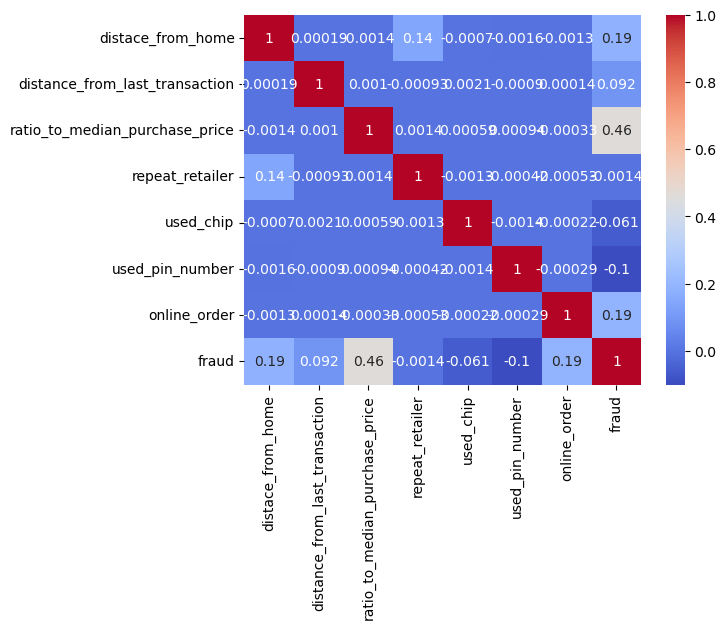

In [20]:
corr = trans_data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

**There seems to be a slight relationship between 'ratio_to_median_purchase_price' and 'Fraud'.**

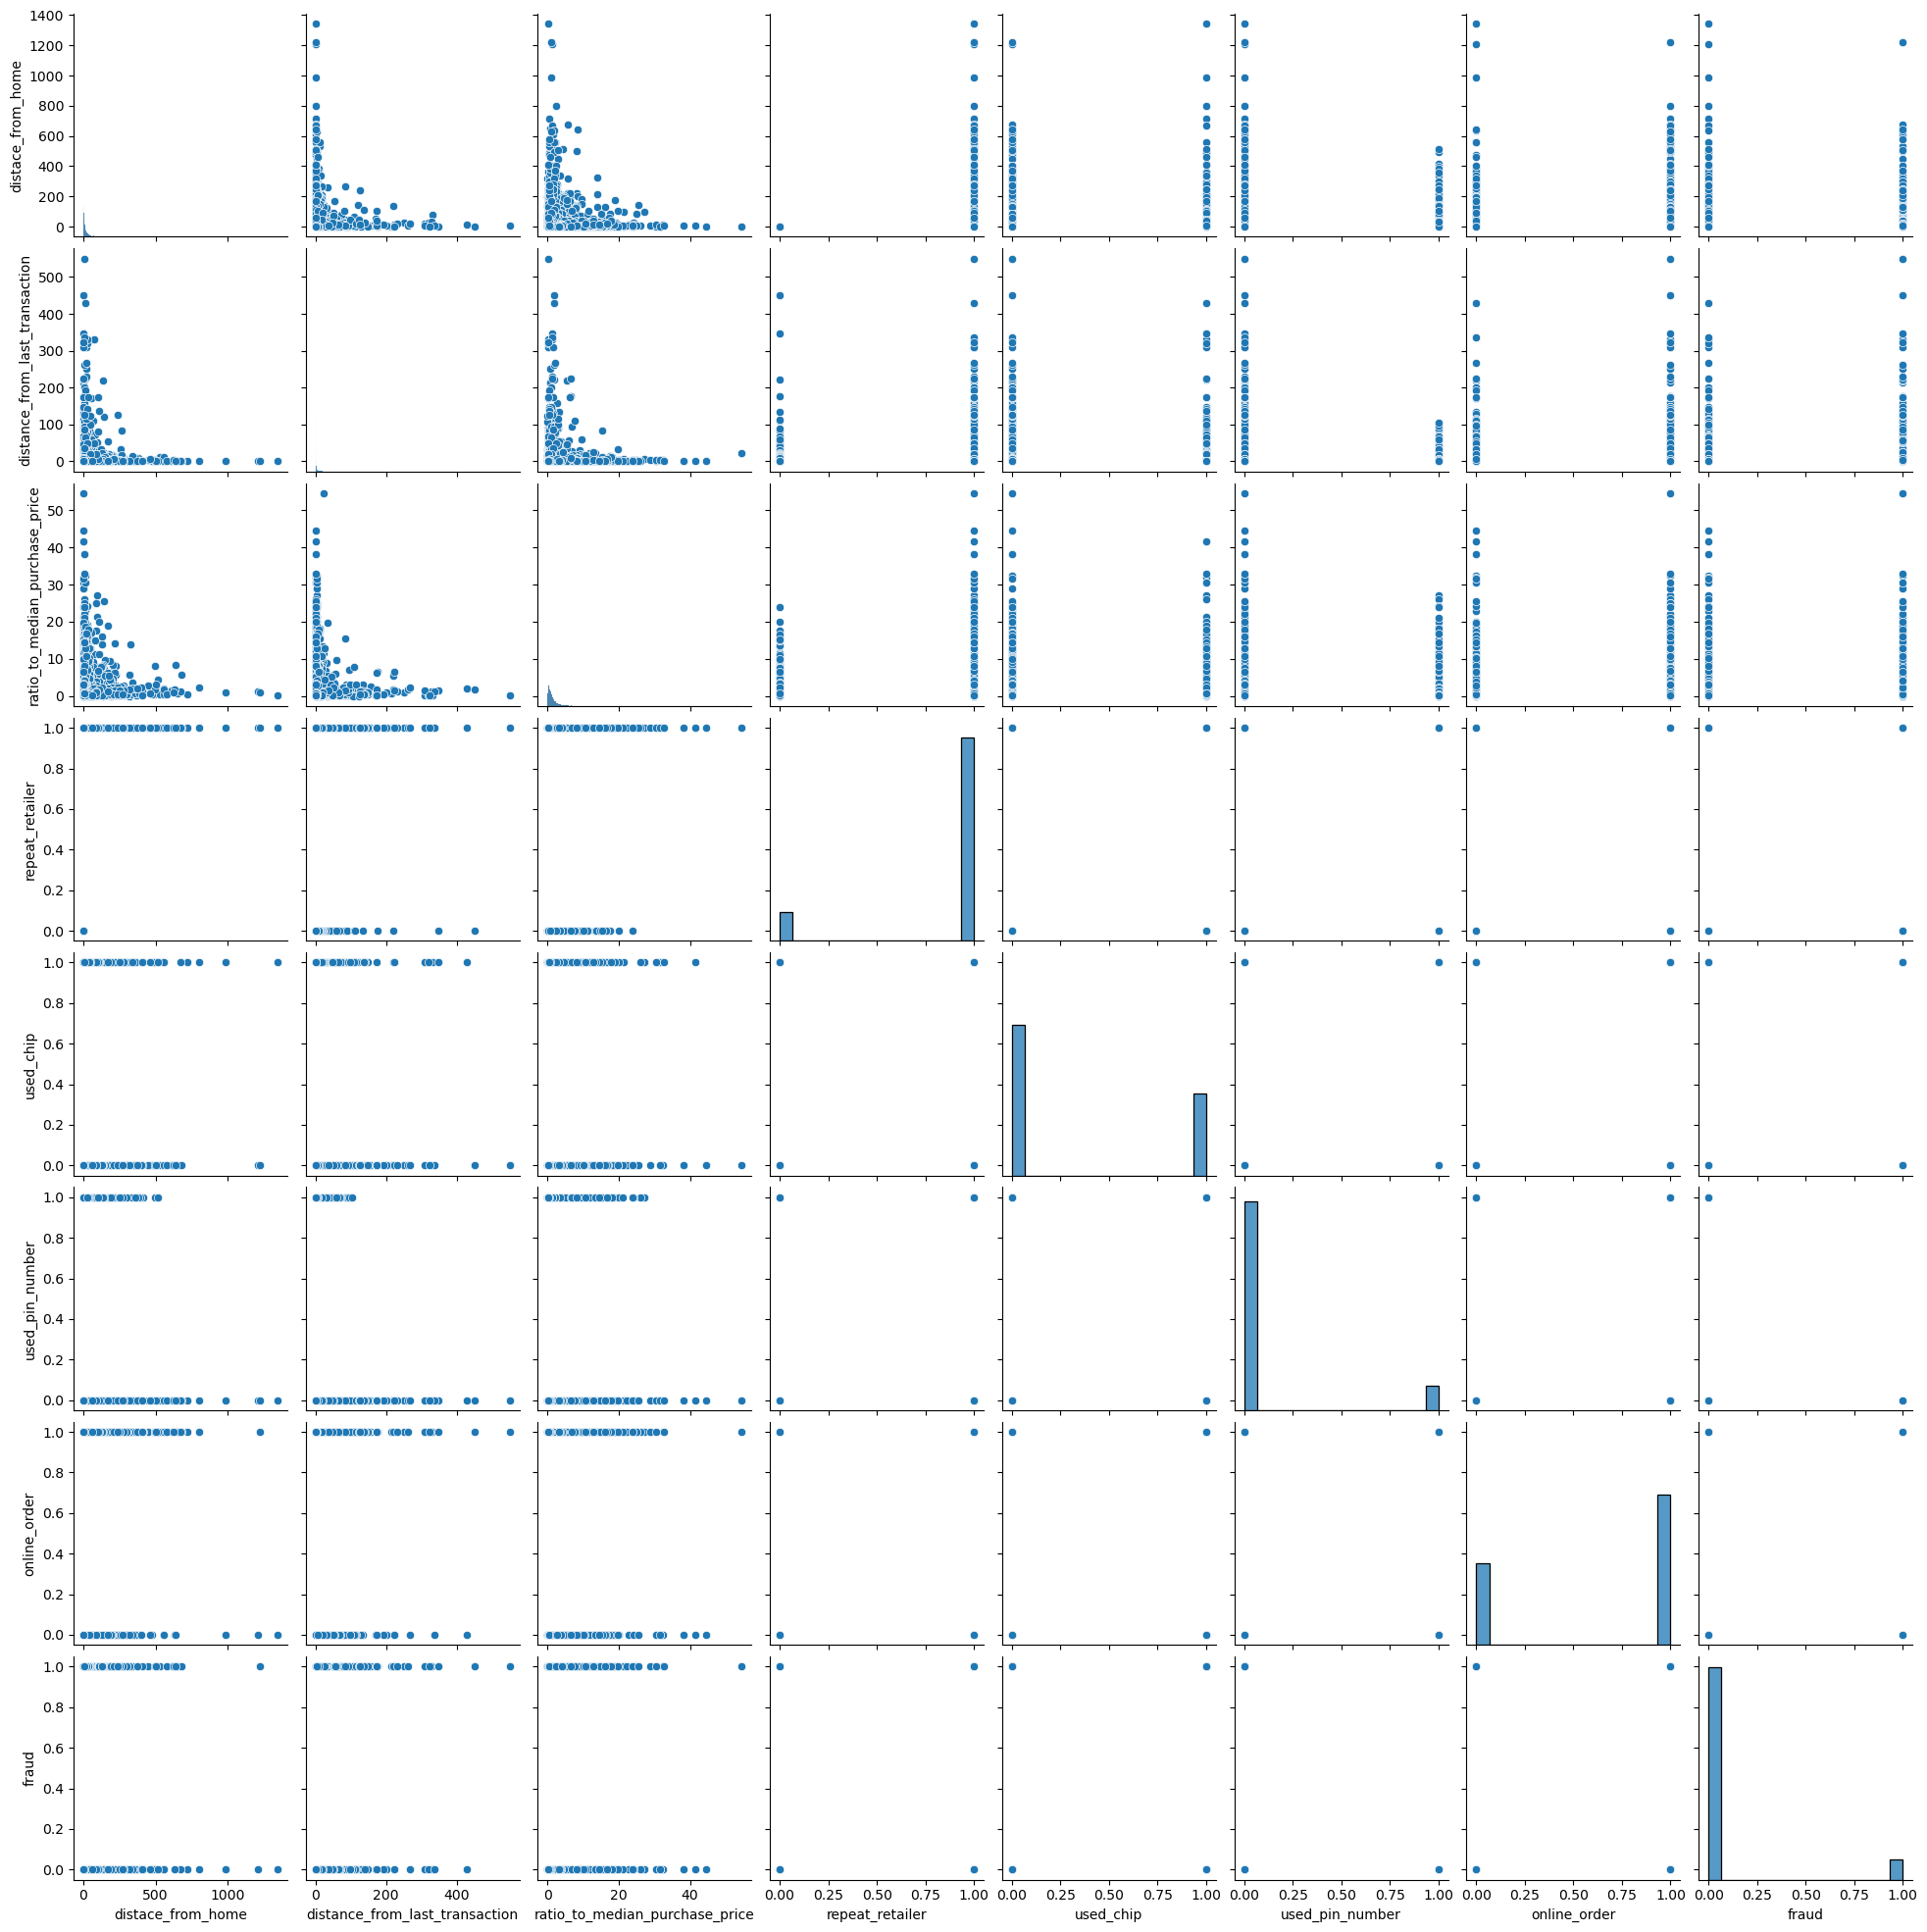

In [22]:
sns.pairplot(trans_data.sample(10000))
plt.show()

### Outlier Detection and Removal

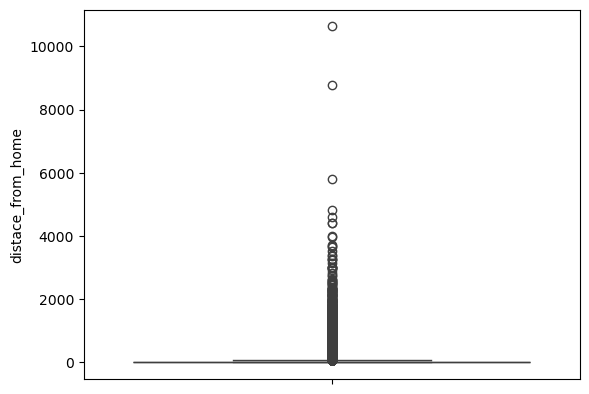

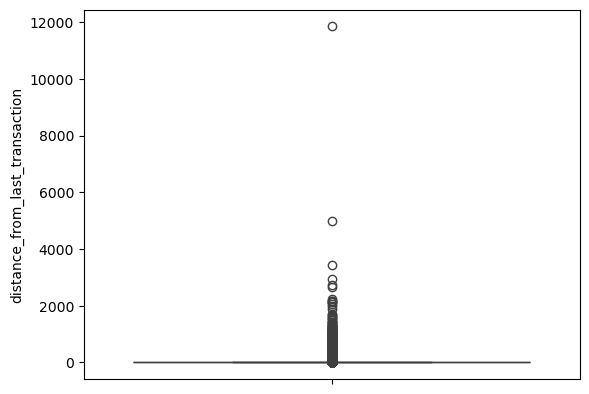

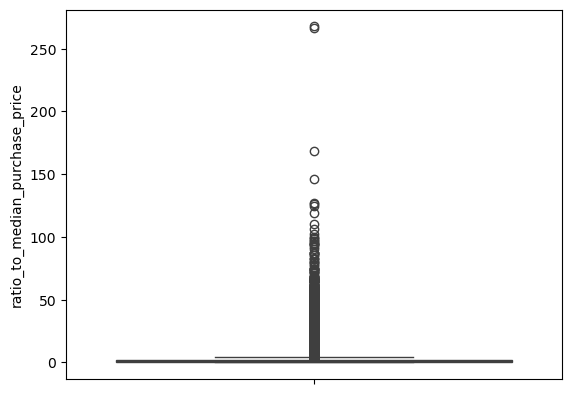

In [24]:
for col in ['distace_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
    sns.boxplot(trans_data[col])
    plt.show()

In [25]:
#Function to remove outliers
def rem_outliers(df, col):
    """function to remove outliers"""

    #percentiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    #IQR
    IQR = Q3 - Q1

    #Define Lower and Upper bounds
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)

    return df

In [26]:
df_2 = rem_outliers(trans_data, 'distace_from_home')
df_1 = rem_outliers(trans_data, 'distance_from_last_transaction')
df = rem_outliers(trans_data, 'ratio_to_median_purchase_price')

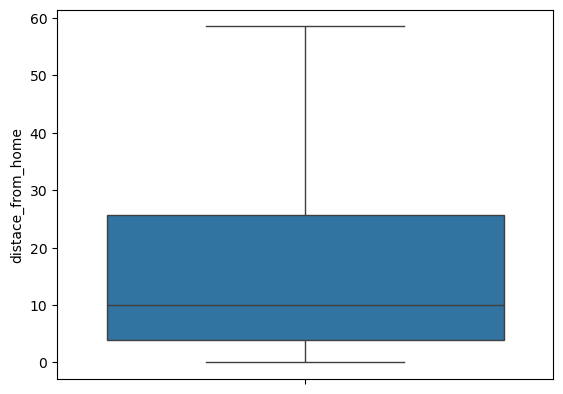

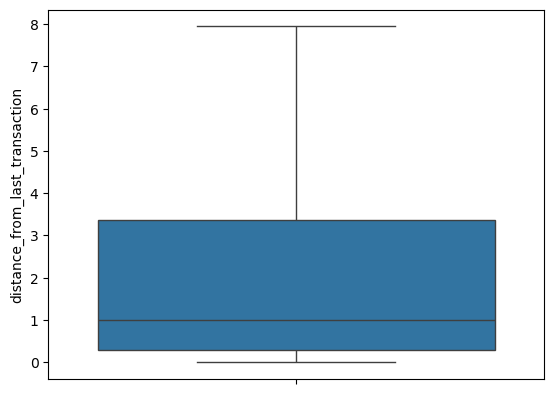

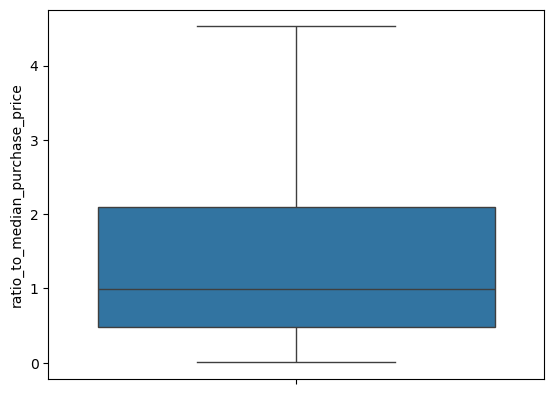

In [27]:
for col in ['distace_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
    sns.boxplot(df[col])
    plt.show()

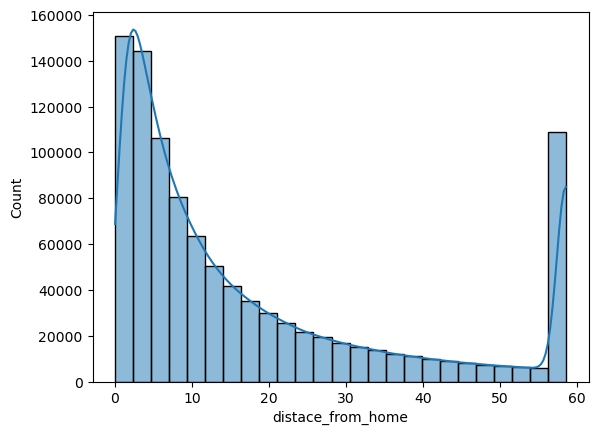

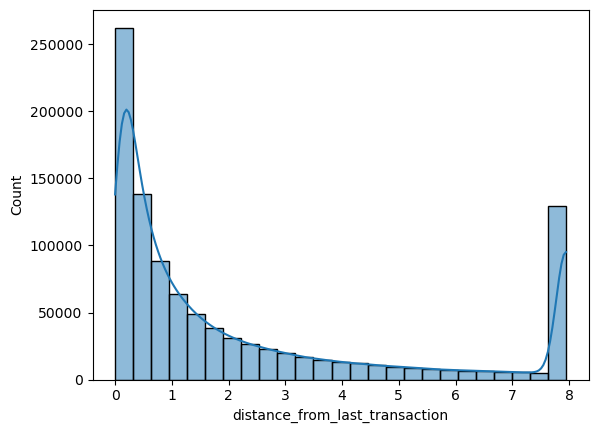

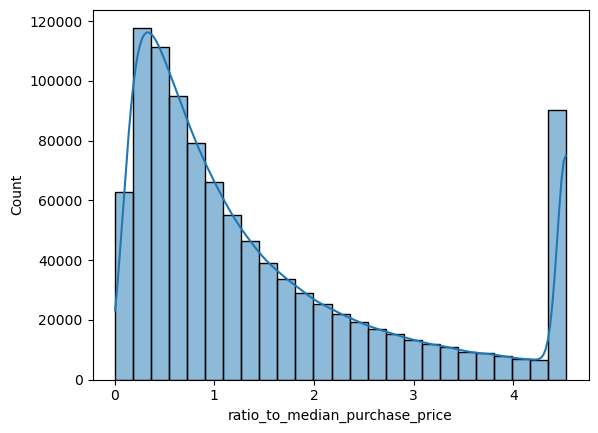

In [28]:
for col in ['distace_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']:
    sns.histplot(x = df[col], bins = 25, kde = True, legend = False)
    plt.show()

**Alot of transactions occured far away from home or from last transaction site and they were relatively large**

### Checking Data Balance

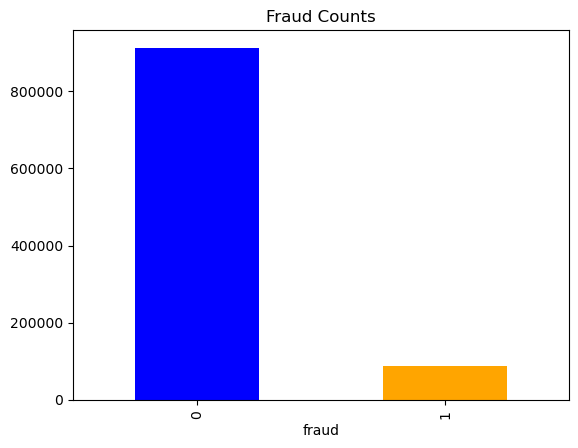

In [31]:
df['fraud'].value_counts().plot(kind = 'bar', color=['blue', 'orange'])
plt.title('Fraud Counts')
plt.show()

**Data is imbalanced**

### Preparing and Scaling Data

In [34]:
def process_data(df, batch_size):

    # Balancing and Splitting data
    X = df.drop(columns = 'fraud', axis = 1)
    y = df['fraud']
    smote = SMOTE(sampling_strategy = 'auto', random_state = 10, k_neighbors = 4)
    X_oversampled, y_oversampled = smote.fit_resample(X, y)
    y_oversampled.value_counts().plot(kind = 'bar', color=['blue', 'orange'])
    plt.title('Fraud Counts')
    plt.show()
    
    # Splitting data between train and tests sets 
    X_train, X_test, y_train, y_test = train_test_split(X_oversampled.values, y_oversampled.values, test_size=0.2, random_state=10, stratify = y_oversampled)
    
    # Streamlining data for faster execution. 
    global pipe
    pipe = Pipeline([('scalar', StandardScaler()), 
                    ('pca', PCA(n_components = .90, random_state = 10)), # Apply PCA to only carry important featurers
                    ('random_forest_classifier', RandomForestClassifier(max_depth = 20, 
                                                                        min_samples_split = 12, 
                                                                        n_estimators = 150, 
                                                                        n_jobs = -1))]) # Applying Hypertuned Classifier

    num_samples = X_train.shape[0]
    num_batches = int(np.ceil(num_samples / batch_size))  # Calculate number of batches

    # Training batches 
    print('Model Training has begun ...Please wait')
    print('. . . . ....') 
    accuracy_scores = []
    training_start_time = time.time()
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, num_samples)  # Handle last batch
        batch_X = X_train[start:end]
        batch_y = y_train[start:end]
        pipe.fit(batch_X, batch_y)

        # Recording accuracy
        accuracy = accuracy_score(batch_y, pipe.predict(batch_X))
        accuracy_scores.append(accuracy)
        
    # Time Record
    elapsed_time = time.time() - training_start_time
    formatted_time = str(round(timedelta(seconds=elapsed_time).total_seconds()/60,2))
    print(f"Training {num_batches} batches took: {formatted_time} mins ")
        
    # Checking accuracy of Model
    sns.histplot(x = accuracy_scores, bins = 25, kde = True, legend = False, color="skyblue")
    plt.title('Accuracy distribution over batches') 
    plt.xlabel('Acuracy')
    plt.show()
    cm = confusion_matrix(y_test, pipe.predict(X_test))
    
    sns.heatmap(cm, annot = True, fmt=  'g', cmap = 'Blues')
    plt.show()
    return classification_report(y_test, pipe.predict(X_test))

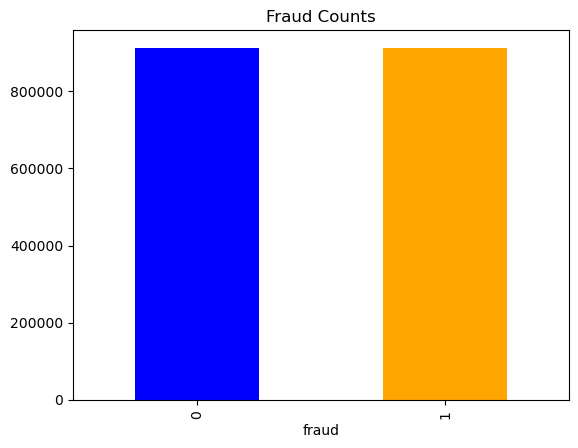

Model Training has begun ...Please wait
. . . . ....
Training 1461 batches took: 11.82 mins 


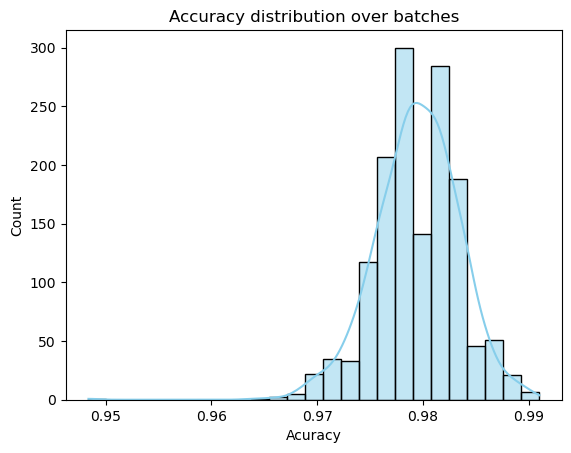

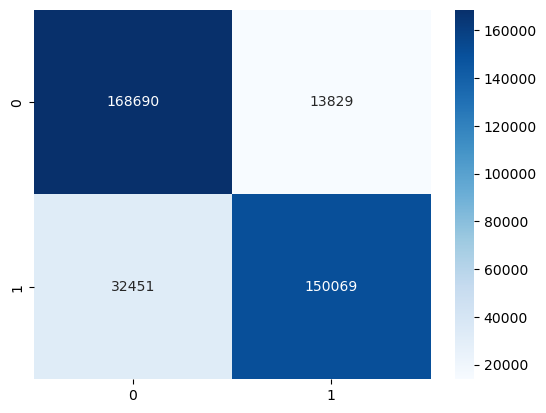

              precision    recall  f1-score   support

           0       0.84      0.92      0.88    182519
           1       0.92      0.82      0.87    182520

    accuracy                           0.87    365039
   macro avg       0.88      0.87      0.87    365039
weighted avg       0.88      0.87      0.87    365039



In [35]:
print(process_data(trans_data, 1000))

In [36]:
set_config(display = 'diagram')
pipe

Pipeline(steps=[('scalar', StandardScaler()),
                ('pca', PCA(n_components=0.9, random_state=10)),
                ('random_forest_classifier',
                 RandomForestClassifier(max_depth=20, min_samples_split=12,
                                        n_estimators=150, n_jobs=-1))])

### Model is 87% accurate. 